load video game sales csv

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score


In [20]:
df = pd.read_csv('vgsales.csv')
df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,61843,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,61844,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,61845,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,61846,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Are certain publishers strongly associated with specific developers?

In [21]:
#filter the df into publisher and developer
cols = ['Publisher', 'Developer']
pub_dev = df[cols].values.tolist()
pub_dev

[['Electronic Arts  ', 'Maxis  '],
 ['Square  ', 'Square  '],
 ['Rockstar Games  ', 'Rockstar North  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Electronic Arts  ', 'EA Black Box  '],
 ['Eidos Interactive  ', 'Core Design  '],
 ['Capcom  ', 'Capcom  '],
 ['Electronic Arts  ', 'Park Place Productions  '],
 ['2K Games  ', 'Visual Concepts  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Konami  ', 'Konami  '],
 ['Sega  ', 'Sonic Team  '],
 ['Sony Interactive Entertainment  ', 'Polyphony Digital  '],
 ['Capcom  ', 'Capcom  '],
 ['Square  ', 'ArtePiazza  '],
 ['Nintendo  ', 'Nintendo EAD  '],
 ['Microsoft Game Studios  ', 'Bungie  '],
 ['Electronic Arts  ', 'EA DICE  '],
 ['2K Games  ', 'Gearbox Software  '],
 ['Nintendo  ', 'Nintendo  '],
 ['PUBG Corporation  ', 'PUBG Corporation  '],
 ['Team17  ', 'Team17  '],
 ['Warner Bros. Interactive Entertainment  ', 'Avalanche Software  '],
 ['Nintendo  ', 'Nintendo  '],
 ['Ubisoft  ', 'Ubisoft  '],
 ['PUBG Corporation  ', 'PUBG Corp

convert to one-hot format

In [22]:
te = TransactionEncoder()
te_array = te.fit(pub_dev).transform(pub_dev)
df_encoded = pd.DataFrame(te_array, columns = te.columns_)

In [23]:
df_encoded.head()

,5 Lives Studios,"AREA 34, Inc.",Hi-Bit Studios,Indietopia Games,Monstars Inc.,Petite Games\t,PlayStation PC,Private Division,Sunborn Games Technology Co,TeamKill Media,...,xPox,xXTomK2007xx,xisai,yaystuff,yeo,yuwaka,yyr,zSlide,zerozerozero,zio3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Run Apriori Algorithm

In [24]:
frequent_itemsets = apriori(df_encoded, min_support = 0.003, use_colnames = True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 73


In [25]:
frequent_itemsets

,support,itemsets
0,0.004584,(2K Games )
1,0.004406,(2K Sports )
2,0.004495,(505 Games )
3,0.009168,(Acclaim Entertainment )
4,0.028092,(Activision )
...,...,...
68,0.003639,"(EA Tiburon , EA Sports )"
69,0.003282,"(Hamster Corporation , SNK Corporation )"
70,0.004637,"(KOEI , Koei )"
71,0.003068,"(Taito , Taito Corporation )"


Generate Association Rules

In [26]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Association Rules: 12


,antecedents,consequents,support,confidence,lift
0,(EA Canada ),(EA Sports ),0.005173,0.749354,50.986083
1,(EA Sports ),(EA Canada ),0.005173,0.351942,50.986083
2,(EA Tiburon ),(EA Sports ),0.003639,0.816000,55.520680
3,(EA Sports ),(EA Tiburon ),0.003639,0.247573,55.520680
4,(Hamster Corporation ),(SNK Corporation ),0.003282,0.630137,89.666574
5,(SNK Corporation ),(Hamster Corporation ),0.003282,0.467005,89.666574
6,(KOEI ),(Koei ),0.004637,0.607477,119.923160
7,(Koei ),(KOEI ),0.004637,0.915493,119.923160
8,(Taito ),(Taito Corporation ),0.003068,0.682540,142.254971
9,(Taito Corporation ),(Taito ),0.003068,0.639405,142.254971


Graph to show support and confidence

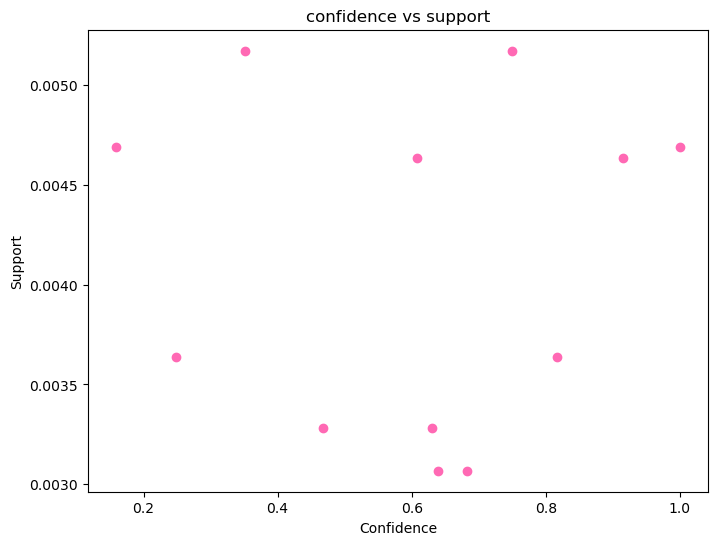

In [27]:

plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['support'], color = 'hotpink')
plt.title('confidence vs support')
plt.xlabel('Confidence')
plt.ylabel('Support')
plt.savefig('ap_scatter.png')
plt.show()

visualize the top ten most published developers

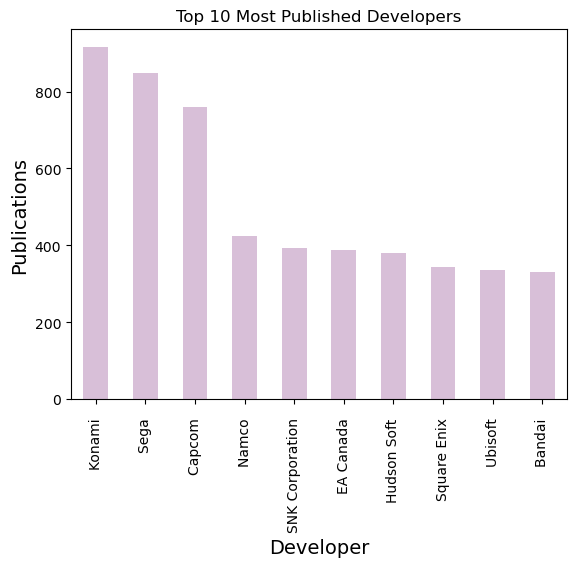

In [39]:
#get top ten
#ignore unknown developers
top_published = df['Developer'].value_counts().iloc[1:11]

#plot graph
top_published.plot(kind = 'bar', title = 'Top 10 Most Published Developers', color = 'thistle')
plt.xlabel('Developer', fontsize = 14)
plt.ylabel('Publications', fontsize = 14)
plt.savefig('most_pub_dev.png', bbox_inches='tight')
plt.show()

EXPLAIN*************************

Which attributes have the highest correlation with critic scores?

In [29]:
#get only numeric values
num_df = df.select_dtypes(include=np.number)
#drop unnamed column
num_df = num_df.drop('Unnamed: 0', axis = 1)
num_df

,Rank,Year,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,11,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
56060,62474,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,62475,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,62476,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,62477,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


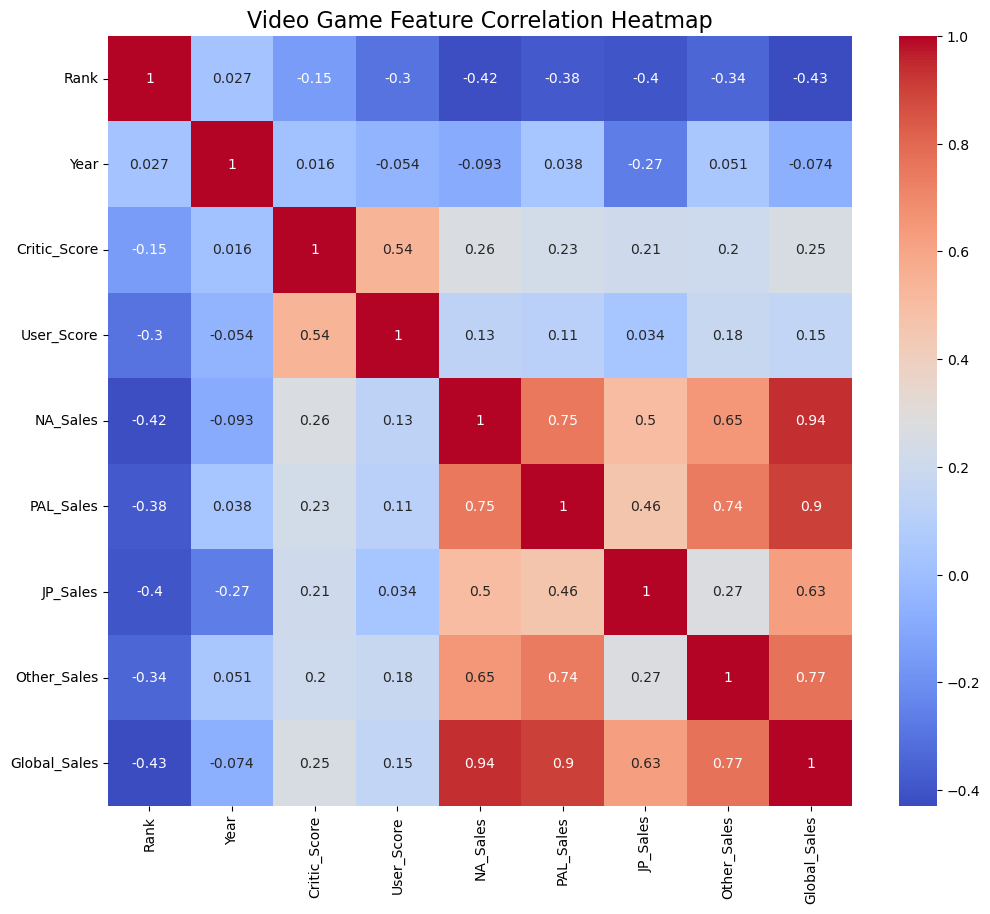

In [40]:
#plot a heatmap to visualize
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Video Game Feature Correlation Heatmap", fontsize=16)
plt.savefig('corr_heatmap.png', bbox_inches='tight')
plt.show()

find features most correlated with critic scores

In [31]:
criticCorr = num_df.corr()['Critic_Score'].sort_values(ascending=False)

print('correlation or critic scores to each other attribute:\n')
print(criticCorr)

#get top 3
corr_top3 = criticCorr.drop('Critic_Score').head(3)
print('\nTop 3 correlations with Critic Scores:\n')
print(corr_top3)

correlation or critic scores to each other attribute:

Critic_Score    1.000000
User_Score      0.537753
NA_Sales        0.263950
Global_Sales    0.252686
PAL_Sales       0.227500
JP_Sales        0.209008
Other_Sales     0.202575
Year            0.015626
Rank           -0.151959
Name: Critic_Score, dtype: float64

Top 3 correlations with Critic Scores:

User_Score      0.537753
NA_Sales        0.263950
Global_Sales    0.252686
Name: Critic_Score, dtype: float64


This shows that video games with a higher user score, NA sales, and global sales have the highest impact on critic scores

plot top 5 correlations

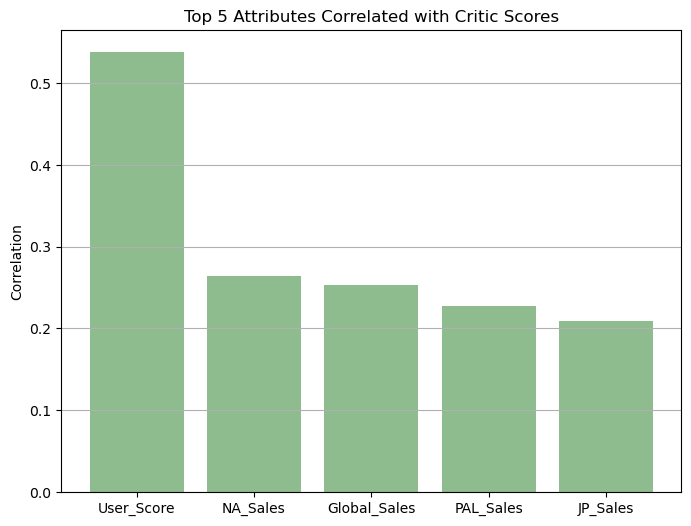

In [41]:
#get top 5
corr_top5 = criticCorr.drop('Critic_Score').head()
plt.figure(figsize=(8, 6))
plt.bar(corr_top5.index, corr_top5.values, color = 'darkseagreen')
plt.title('Top 5 Attributes Correlated with Critic Scores')
plt.ylabel('Correlation')
plt.grid(axis = 'y')
plt.savefig('Corr_bar.png', bbox_inches='tight')


This helps visualize how high the correlation between the user score and the critic score is. It also shows that games with high sales are correlated with high critic scores.

Can we predict whether a video game's sales will be above or below average based on user score, critic score, and year?

In [33]:
#calculate average to base above and below on
av_sales = df['Global_Sales'].mean()
df['Average'] = df['Global_Sales'] >= av_sales
df

,Unnamed: 0,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Average
0,0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,61843,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56061,61844,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56062,61845,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
56063,61846,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [34]:
#features to do decision tree on
features = ['User_Score', 'Critic_Score', 'Year']

X = df[features]
y = df['Average']

#implement label encoder
encode = LabelEncoder()
y = encode.fit_transform(y)

#split the dataset into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

#create a decision tree classifier model
classifier = DecisionTreeClassifier(max_depth=4)

#train the model
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

visualize decision tree

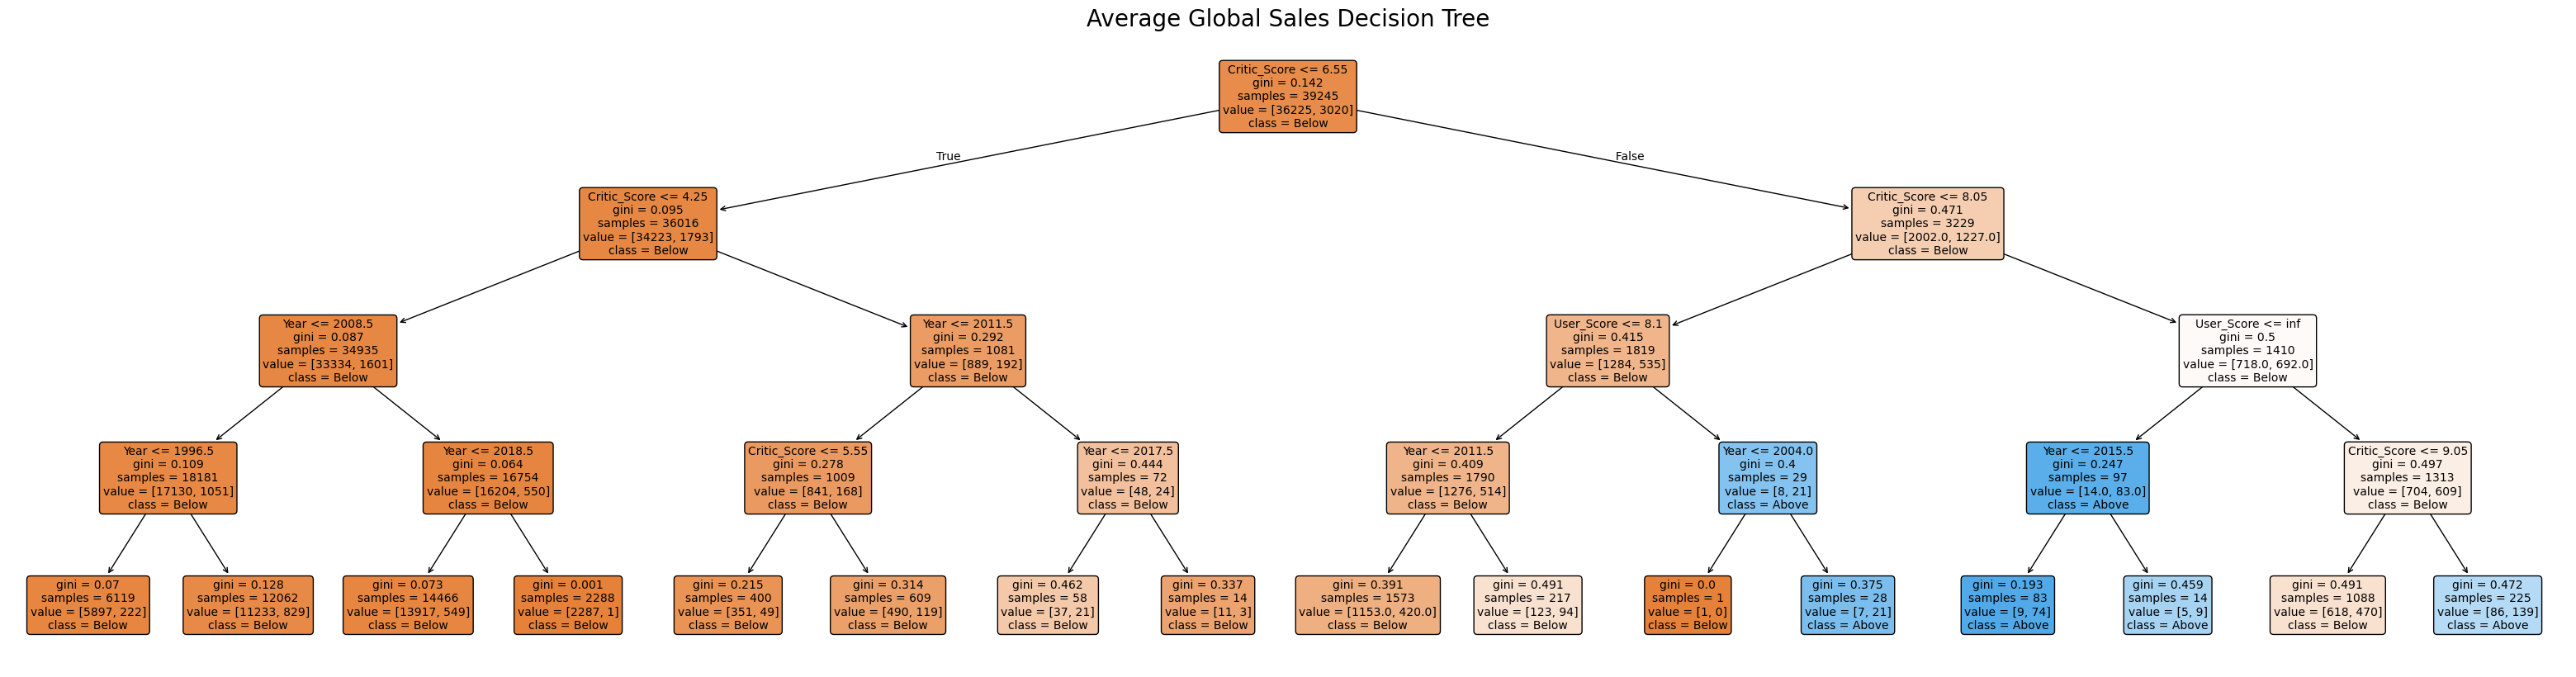

In [42]:
#plot
plt.figure(figsize=(40, 10))
plot_tree(classifier, feature_names=features, class_names=['Below', 'Above'], filled=True, rounded=True, fontsize=10)
plt.title("Average Global Sales Decision Tree", fontsize = 20)
plt.savefig('avg_sales_tree.png', bbox_inches='tight')